### The squared exponential (aka Gaussian) function

Let $\color{blue}d$ be the distance between two input points.
$$
\color{blue}{
C(d) = \sigma^2 \exp\left(-\frac{d^2}{2\ell^2}\right)}
$$

- $\color{blue}{\sigma^2}$ is the variance parameter.
- $\color{blue}{\ell}$ is the "length scale" parameter. Another popular parametrization uses $\color{blue}{\phi = -\frac{1}{2\ell^2}}$.


### The Matérn function

Let $\color{blue}d$ be the distance between two input points
$$
\color{blue}{
C_\nu(d) = \sigma^2\,\frac{2^{1-\nu}}{\Gamma(\nu)}\Bigg(\sqrt{2\nu}\frac{d}{\ell}\Bigg)^\nu K_\nu\Bigg(\sqrt{2\nu}\frac{d}{\ell}\Bigg),
}
$$
where $\color{blue}{\Gamma}$ is the gamma function, $\color{blue}{K_\nu}$ is the modified Bessel function of the second kind, $\color{blue}{\sigma^2}$ is the variance parameter, and $\color{blue}{\nu}$ and $\color{blue}{\ell}$ are non-negative parameters. 

<br>
This function simplifies when $\color{blue}{\nu}$ is half-integer: $\color{blue}{\nu = p + 1/2}$, where $\color{blue}{p}$ is a non-negative integer.
<br>

$$
\color{blue}{
C_{p+1/2}(d) = \sigma^2\exp\left(-\frac{\sqrt{2p+1}d}{\ell}\right)\frac{p!}{(2p)!}\sum_{i=0}^p\frac{(p+i)!}{i!(p-i)!}\left(\frac{2\sqrt{2p+1}d}{\ell}\right)^{p-i}},
$$

Notice how it is a product of an exponential and a polynomial of order $\color{blue}{p}$, which gives:
* for $\color{blue}{\nu = 1/2\ (p=0)}$ $\;\Rightarrow\;$ $\color{blue}{C_{1/2}(d) = \sigma^2\exp\left(-\frac{d}{\ell}\right)}$,
* for $\color{blue}{\nu = 3/2\ (p=1)}$ $\;\Rightarrow\;$ $\color{blue}{C_{3/2}(d) = \sigma^2\left(1+\frac{\sqrt{3}d}{\ell}\right)\exp\left(-\frac{\sqrt{3}d}{\ell}\right)}$,
* for $\color{blue}{\nu = 5/2\ (p=2)}$ $\;\Rightarrow\;$ $\color{blue}{C_{5/2}(d) = \sigma^2\left(1+\frac{\sqrt{5}d}{\ell}+\frac{5d^2}{3\ell^2}\right)\exp\left(-\frac{\sqrt{5}d}{\ell}\right)}$.

As $\color{blue}{\nu\rightarrow\infty}$, the Matérn covariance converges to the squared exponential function.

For $\color{blue}{\nu = 1/2}$ the process becomes very rough, and for $\color{blue}{\nu = 7/2}$, it is probably very hard from finite noisy training examples to
distinguish between values of $\color{blue}{\nu = 7/2}$ (or even to distinguish between finite values of $\color{blue}{\nu}$ and $\color{blue}{\nu\rightarrow\infty}$. 

#### Reference:
Gaussian Processes for Machine Learning by Carl Edward Rasmussen and Chris Williams http://www.gaussianprocess.org/gpml/ (Chapter 4, pages 83-85)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.spatial.distance import cdist
from numpy.random import multivariate_normal

In [2]:
def squared_exponential(sigma, ell, xa, xb):
    '''Compute the squared exponential covariance function for two input vectors,  
    xa and xb.'''
    # Calculated the squared Euclidian distance matrix
    D = cdist(xa, xb, 'sqeuclidean')
    C = sigma**2 * np.exp(-D/ell**2)
    return C


def matern(sigma, nu, ell, xa, xb):
    '''Compute the matern covariance function for two input vectors, xa and xb at
    for nu value in {.5, 1.5, 2.5}.'''
    if nu not in [.5, 1.5, 2.5]:
        raise ValueError('nu must be in [.5, 1.5, 2.5]')
    else:
        D = cdist(xa, xb, 'euclidean')
        if nu == .5:
            C = sigma**2 * np.exp(-D/ell)
        elif nu == 1.5:
            C = sigma**2 * (1 + np.sqrt(3)*D/ell)* np.exp(-np.sqrt(3)*D/ell)
        elif nu == 2.5:
            D2 = cdist(xa, xb, 'sqeuclidean')
            C = sigma**2 * (1 + np.sqrt(5)*D/ell + 
                           5*D2/(3*ell**2))* np.exp(-np.sqrt(5)*D/ell)
    return C

In [3]:
def get_y_gp(x, mu, cov_params, n_curves=1, func='squared_exponential'):
    '''Generates n_curves from a Gaussian process with one input 
    and a constant mean.
    '''
    if func == 'squared_exponential':
        sigma, ell = cov_params
        C = squared_exponential(sigma, ell, x, x)
    elif func == 'matern':
        sigma, nu, ell = cov_params
        C = matern(sigma, nu, ell, x, x)
        # constant mean
    y = multivariate_normal(np.repeat(mu, len(x)),
                            C,
                            n_curves)
    plt.figure(figsize=(12, 6))
    plt.plot(x, y.T)
    plt.axhline(mu, color='k', linestyle=':')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    if func == 'squared_exponential':
        plt.title(f'{func}: $\mu$={mu}, $\sigma^2$={sigma**2}, $\ell$={ell}',
                  fontsize=20)
    elif func == 'matern':
        plt.title(f'{func}: $\mu$={mu}, $\sigma^2$={sigma**2}, $\\nu$={nu}, $\ell$={ell}',
                  fontsize=20)
    
    return y

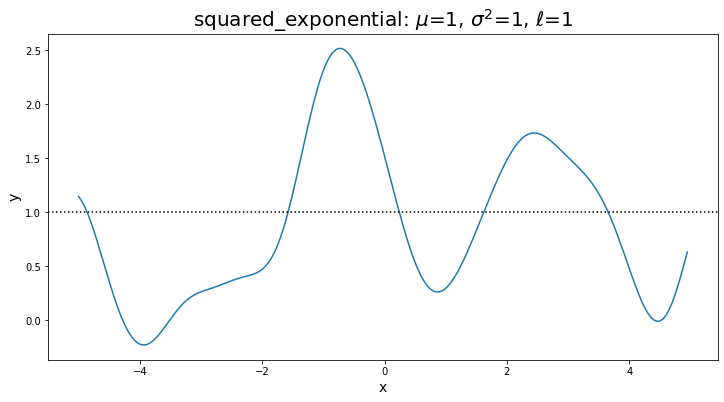

In [4]:
np.random.seed(seed=4)
x = np.arange(-5, 5, .05)
x = x.reshape((len(x), 1))
y = get_y_gp(x, 1,[1,1],1)

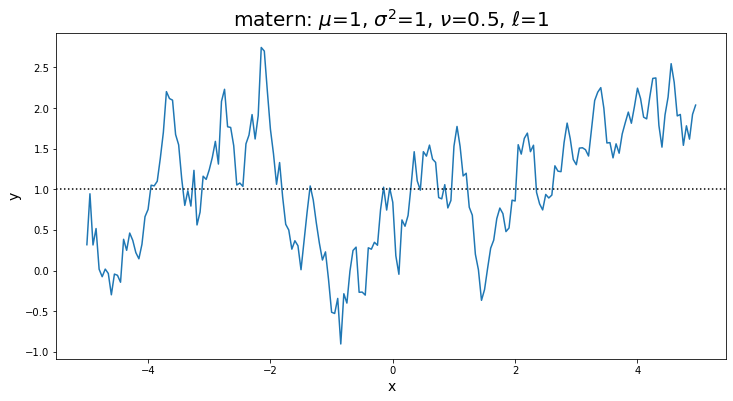

In [5]:
np.random.seed(seed=4)
x = x.reshape((len(x), 1))
y = get_y_gp(x, 1, [1, .5, 1], n_curves=1, func='matern')

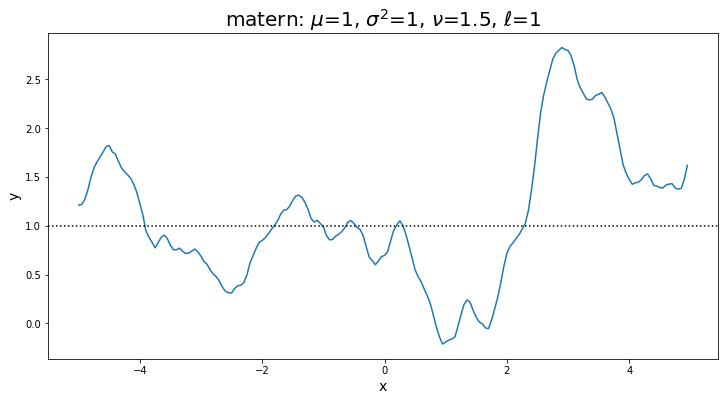

In [6]:
np.random.seed(seed=4)
x = x.reshape((len(x), 1))
y = get_y_gp(x, 1, [1, 1.5, 1], n_curves=1, func='matern')

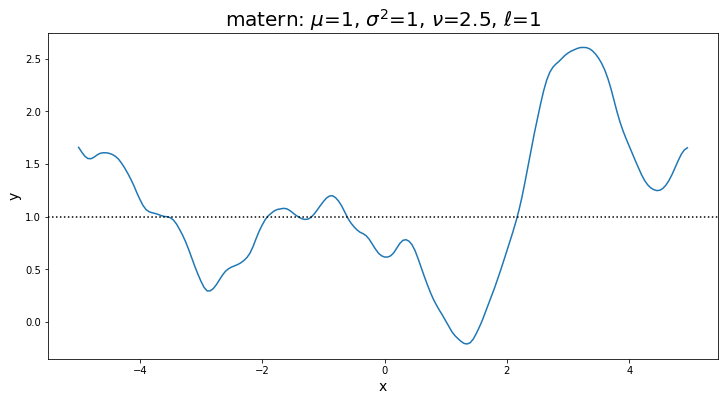

In [7]:
np.random.seed(seed=4)
x = x.reshape((len(x), 1))
y = get_y_gp(x, 1, [1, 2.5, 1], n_curves=1, func='matern')